In [2]:
'''Forecast the sales for 1 year for the furniture products category on the basis of the historical data'''

'Forecast the sales for 1 year for the furniture products category on the basis of the historical data'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df=pd.read_excel(r"C:\Python Imarticus\Basics\Time Series Modelling\Sample - Superstore.xls",header=0)
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
df.shape

(9994, 21)

### Pre-Processing

In [6]:
#Furniture data needs to be subsetted as the predictions needs to be done on this category. Identify the no of observations for the same

df.Category.value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [7]:
#Subsetting Furniture data

furniture=df.loc[df["Category"]=='Furniture']
furniture.shape

(2121, 21)

In [8]:
#Identify the period of data

furniture['Order Date'].min(),furniture['Order Date'].max()

(Timestamp('2014-01-06 00:00:00'), Timestamp('2017-12-30 00:00:00'))

In [9]:
#Subsetting to generate single dimensional data(date and Y vars)

furniture=furniture[['Order Date','Sales']]
furniture.shape

(2121, 2)

In [10]:
#Sort the data in chronological order

furniture=furniture.sort_values('Order Date',ascending=True)

In [11]:
#Identify Missing values in the Y var

furniture.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [12]:
furniture.head(10)

,Order Date,Sales
7474,2014-01-06,2573.820
7660,2014-01-07,76.728
866,2014-01-10,51.940
716,2014-01-11,9.940
2978,2014-01-13,545.940
4938,2014-01-13,333.999
6474,2014-01-14,61.960
970,2014-01-16,127.104
5465,2014-01-19,181.470
6327,2014-01-20,272.940


In [13]:
#Group the data which has same date and aggregate sales value. Also reset index

furniture=furniture.groupby('Order Date')['Sales'].sum().reset_index()
furniture.shape

(889, 2)

In [14]:
furniture.head(10)

,Order Date,Sales
0,2014-01-06,2573.820
1,2014-01-07,76.728
2,2014-01-10,51.940
3,2014-01-11,9.940
4,2014-01-13,879.939
5,2014-01-14,61.960
6,2014-01-16,127.104
7,2014-01-19,181.470
8,2014-01-20,1413.510
9,2014-01-21,25.248


In [15]:
#Set Index to order date

furniture=furniture.set_index('Order Date')

In [16]:
furniture.head(10)

,Sales
Order Date,
2014-01-06,2573.820
2014-01-07,76.728
2014-01-10,51.940
2014-01-11,9.940
2014-01-13,879.939
2014-01-14,61.960
2014-01-16,127.104
2014-01-19,181.470
2014-01-20,1413.510


In [17]:
#Resampling data to achieve equally spaced time intervals. Roll up to weekly level and take mean of sales for a specific week

y=furniture['Sales'].resample('W').mean()

In [18]:
print(y.shape)
y

(208,)


Order Date
2014-01-12     678.107000
2014-01-19     312.618250
2014-01-26     551.986000
2014-02-02     311.833000
2014-02-09      14.560000
                 ...     
2017-12-03    2286.881714
2017-12-10    1465.734000
2017-12-17     773.303167
2017-12-24    1212.340500
2017-12-31    1009.391200
Freq: W-SUN, Name: Sales, Length: 208, dtype: float64

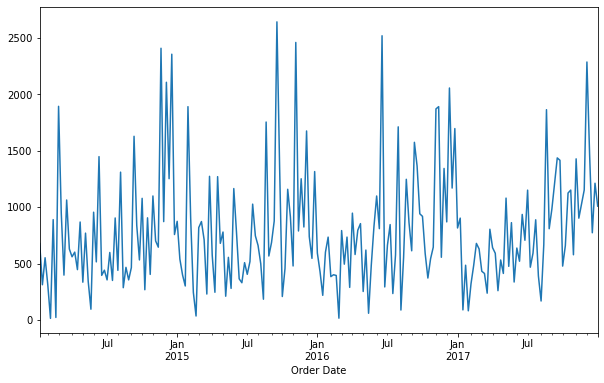

In [19]:
y.plot(figsize=(10,6))
plt.show()

In [20]:
'''Above roll up to week has shown 208 obs and it is not showing up the pattern neatly, rather it is giving a zig zag pattern.
Hence we go for monthly roll up to identify the pattern in the data'''

'Above roll up to week has shown 208 obs and it is not showing up the pattern neatly, rather it is giving a zig zag pattern.\nHence we go for monthly roll up to identify the pattern in the data'

In [21]:
#rolling up to montly start date. MS-Month start, M-month end, D-Daily,W-Weekly

y=furniture['Sales'].resample('MS').mean()

In [22]:
print(y.shape)
y

(48,)


Order Date
2014-01-01     480.194231
2014-02-01     367.931600
2014-03-01     857.291529
2014-04-01     567.488357
2014-05-01     432.049188
2014-06-01     695.059242
2014-07-01     601.169500
2014-08-01     457.521656
2014-09-01     992.353367
2014-10-01     769.015437
2014-11-01     980.221486
2014-12-01    1532.298325
2015-01-01     978.328467
2015-02-01     522.395667
2015-03-01     781.236437
2015-04-01     805.822962
2015-05-01     624.996700
2015-06-01     428.565500
2015-07-01     719.706316
2015-08-01     602.412012
2015-09-01    1382.790684
2015-10-01     632.980184
2015-11-01    1286.701354
2015-12-01    1049.355418
2016-01-01     508.182867
2016-02-01     356.868273
2016-03-01     609.575810
2016-04-01     695.373158
2016-05-01     687.265227
2016-06-01     816.910750
2016-07-01     768.736412
2016-08-01     734.307782
2016-09-01    1135.953371
2016-10-01     624.872474
2016-11-01    1271.345152
2016-12-01    1410.719808
2017-01-01     397.602133
2017-02-01     528.179800
2

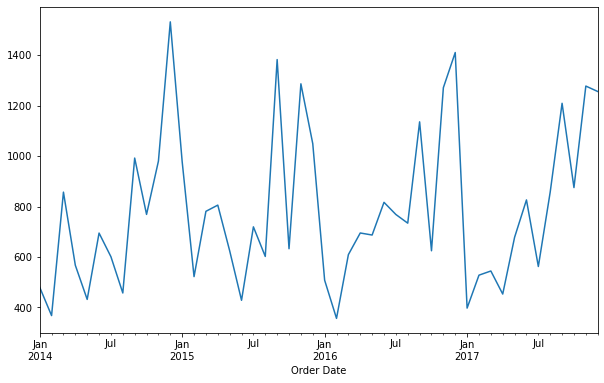

In [23]:
y.plot(figsize=(10,6))
plt.show()

In [24]:
'''From above values we can see the avg amount of sales per month
   Across the years we dont have trend, but within the trend we have some kind. But over all data we dont have continuous trend
   We have seasonality where in initial months we have some increase and in dec in each yr we have higher sales which follows 
   some seasonality across years '''

'From above values we can see the avg amount of sales per month\n   Across the years we dont have trend, but within the trend we have some kind. But over all data we dont have continuous trend\n   We have seasonality where in initial months we have some increase and in dec in each yr we have higher sales which follows \n   some seasonality across years '

### Split Data

In [25]:
#splitting data into train and validation test data, 2014-2016 train, 2017-testing data

train=y.loc[:'2016-12-01']
test=y.loc['2017-01-01':]
print(train.tail())
print()
print(test.tail())

Order Date
2016-08-01     734.307782
2016-09-01    1135.953371
2016-10-01     624.872474
2016-11-01    1271.345152
2016-12-01    1410.719808
Freq: MS, Name: Sales, dtype: float64

Order Date
2017-08-01     857.881889
2017-09-01    1209.508583
2017-10-01     875.362728
2017-11-01    1277.817759
2017-12-01    1256.298672
Freq: MS, Name: Sales, dtype: float64


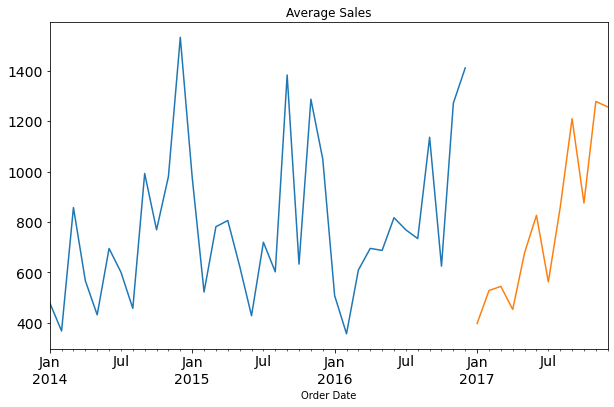

In [26]:
#plot train and test data

train.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
test.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()

### Decomposition Plot : To decide on which model to be built

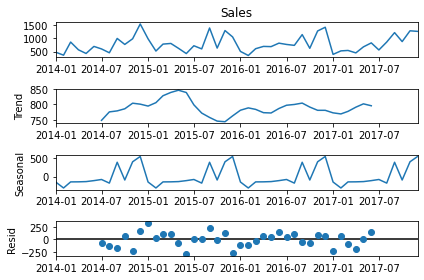

In [27]:
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(y)
fig = decomposition.plot()
plt.show()

In [28]:
'''Trend: We got random line and no increase/decrease pattern. Hence no trend
   Seasonal: We see some pattern repeating. Need to identify the time period of pattern correctly'''

'Trend: We got random line and no increase/decrease pattern. Hence no trend\n   Seasonal: We see some pattern repeating. Need to identify the time period of pattern correctly'

### Model1: Simple Exponential Smoothing/First order ES

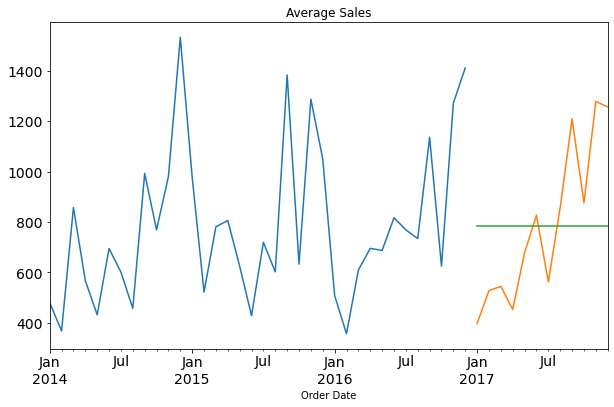

In [29]:
'''smoothing level is also called alpha value in statistical terms. This is mentioned as trail and error value only.
   alpha value should be in the range of 0 to 1.values close to 0 indicate that older values are very less imp 
   compared to the recent values. values close to 1 indicate that older values are equally imp
   '''

from statsmodels.tsa.api import SimpleExpSmoothing
Exp_Smooth = test.copy()
fit1 = SimpleExpSmoothing(train).fit(smoothing_level=0.001)
Exp_Smooth['SES_Forecasts'] = fit1.forecast(steps=len(test))

#plotting
train.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
test.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Exp_Smooth['SES_Forecasts'].plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()

#### Metrics Evaluation

In [30]:
'''aic is used to compare difft models with same alg but difft data/parameter value. We change the smoothing level and 
   check for aic's. Choose the model with returns lowest aic. Lower smoothing level will give lower aic value'''

fit1.aic

415.5942255753394

In [31]:
'''RMSE is used to compare different models with same data but different Alg.choose the model with lowest RMSE value'''

from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test, Exp_Smooth.SES_Forecasts))
print(rms)

303.50907069636435


### Model2: Holt’s Linear Trend Model/Second order ES/Double ES

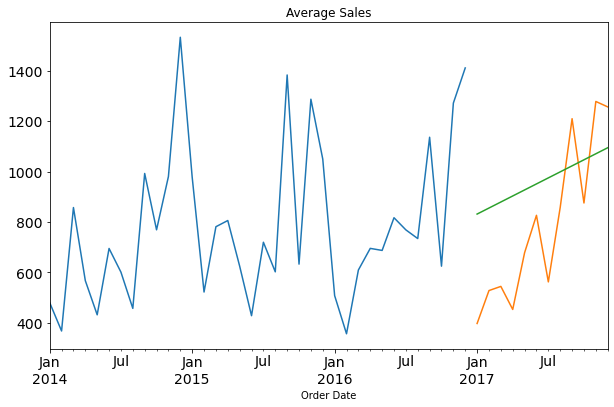

In [32]:
'''smoothing level: also called alpha value in statistical terms. This is mentioned as trail and error value only.
   alpha value should be in the range of 0 to 1.values close to 0 indicate that older values are very less imp 
   compared to the recent values. values close to 1 indicate that older values are equally imp
   smoothing_slope: trail and error beta value which indicates the inclination angle'''

from statsmodels.tsa.api import Holt
Holt_df = test.copy()
fit1 = Holt(train).fit(smoothing_level = 0.1,smoothing_slope = 0.3)
Holt_df['Holt_linear_Forecasts'] = fit1.forecast(len(test))

train.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
test.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Holt_df['Holt_linear_Forecasts'].plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()

In [33]:
fit1.aic

427.9438602932987

In [34]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test, Holt_df.Holt_linear_Forecasts))
print(rms)

290.1430995297401


In [35]:
'''code for trail and error method to change smoothing level and slope values

import numpy as np
for i in np.arange(0,1,0.01):
    for j in np.arange(0,1,0.01):
        from statsmodels.tsa.api import Holt
        Holt_df = test.copy()
        fit1 = Holt(train).fit(smoothing_level = i,smoothing_slope = j)
        Holt_df['Holt_linear'] = fit1.forecast(len(test))
        print(fit1.aic,i,j)'''

"code for trail and error method to change smoothing level and slope values\n\nimport numpy as np\nfor i in np.arange(0,1,0.01):\n    for j in np.arange(0,1,0.01):\n        from statsmodels.tsa.api import Holt\n        Holt_df = test.copy()\n        fit1 = Holt(train).fit(smoothing_level = i,smoothing_slope = j)\n        Holt_df['Holt_linear'] = fit1.forecast(len(test))\n        print(fit1.aic,i,j)"

In [36]:
'''We can change smoothing level and slope values and decide on lower aic and rmse values and decide on the better parameters '''

'We can change smoothing level and slope values and decide on lower aic and rmse values and decide on the better parameters '

### Model3: Holt-Winter Model/Third order ES

C:\Users\Neeharika\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


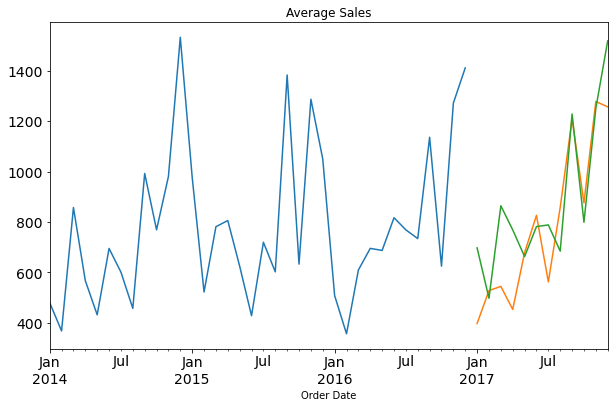

In [37]:
'''seasonalperiods=gamma value, for how much time pattern is repeating
 trend='add': when data is constant 
 trend='mul': when data is in exponential pattern
 seasonal='add': when data is constant 
 seasonal='mul': when data is in exponential pattern'''

from statsmodels.tsa.api import ExponentialSmoothing
Holt_Winter_df = test.copy()
fit1 = ExponentialSmoothing(train ,seasonal_periods=12,trend='add',
                            seasonal='add').fit()
Holt_Winter_df['Holt_Winter_Forecasts'] = fit1.forecast(len(test))

train.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
test.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Holt_Winter_df['Holt_Winter_Forecasts'].plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()

In [38]:
fit1.aic

409.61009297964534

In [39]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test, Holt_Winter_df.Holt_Winter_Forecasts))
print(rms)

193.9119904555351


In [40]:
'''By above metrics we can see that Holt winter is better when we see the RMSE values across the models and also handling
seasonlity component and the graph on testing data. Using this model we can now forecast for future years.'''

'By above metrics we can see that Holt winter is better when we see the RMSE values across the models and also handling\nseasonlity component and the graph on testing data. Using this model we can now forecast for future years.'

### Model4: ARIMA

In [41]:
"""
Box-Jenkins Method:
1.Identification- to identify the optimum values for the parameters PDQ-auto_arima()
2.Estimation-build the model using the optimum values
3.Validation-interpret how good is the model by validation testing
4.Forecasting- forecast for future time periods

For good models follow as below:
p+q+P+Q<=10
p+q<=3
"""

'\nBox-Jenkins Method:\n1.Identification- to identify the optimum values for the parameters PDQ-auto_arima()\n2.Estimation-build the model using the optimum values\n3.Validation-interpret how good is the model by validation testing\n4.Forecasting- forecast for future time periods\n\nFor good models follow as below:\np+q+P+Q<=10\np+q<=3\n'

##### Identification

In [42]:

#max_order: p+q+P+Q
#m: seasonality patterns period
#seasonal: if we have seasonal component in data so that SARIMA is built
#test : check for augmented dickey filler test to check for stationary data
#trace: to display log of aic values

import pmdarima as pm
model = pm.auto_arima(y,start_p=0, max_p=3, d=None, max_d=2,start_q=0, max_q=3,
                      start_P=0,max_P=3, D=None, max_D=2, start_Q=0, max_Q=3,
                      max_order=10, m=12, seasonal=True, information_criterion='aic',
                      test='adf',trace=True,random_state=10)

C:\Users\Neeharika\AppData\Roaming\Python\Python37\site-packages\pmdarima\arima\auto.py:523: ModelFitWarning: Having 3 or more differencing operations is not recommended. Please consider reducing the total number of differences.
  "number of differences.", ModelFitWarning)


Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,1,0)[12]             : AIC=524.319, Time=0.32 sec
 ARIMA(1,2,0)(1,1,0)[12]             : AIC=503.080, Time=0.24 sec


C:\Users\Neeharika\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Neeharika\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)


 ARIMA(0,2,1)(0,1,1)[12]             : AIC=inf, Time=0.22 sec
 ARIMA(1,2,0)(0,1,0)[12]             : AIC=502.081, Time=0.04 sec


C:\Users\Neeharika\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)


 ARIMA(1,2,0)(0,1,1)[12]             : AIC=502.468, Time=0.20 sec


C:\Users\Neeharika\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)


 ARIMA(1,2,0)(1,1,1)[12]             : AIC=inf, Time=0.60 sec
 ARIMA(2,2,0)(0,1,0)[12]             : AIC=499.444, Time=0.07 sec
 ARIMA(2,2,0)(1,1,0)[12]             : AIC=497.244, Time=0.21 sec
 ARIMA(2,2,0)(2,1,0)[12]             : AIC=495.283, Time=0.77 sec


C:\Users\Neeharika\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)


 ARIMA(2,2,0)(3,1,0)[12]             : AIC=497.128, Time=1.63 sec


C:\Users\Neeharika\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)
C:\Users\Neeharika\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Neeharika\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)


 ARIMA(2,2,0)(2,1,1)[12]             : AIC=inf, Time=1.50 sec


C:\Users\Neeharika\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Neeharika\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)


 ARIMA(2,2,0)(1,1,1)[12]             : AIC=inf, Time=0.60 sec
 ARIMA(2,2,0)(3,1,1)[12]             : AIC=inf, Time=1.65 sec
 ARIMA(1,2,0)(2,1,0)[12]             : AIC=503.589, Time=0.56 sec
 ARIMA(3,2,0)(2,1,0)[12]             : AIC=490.119, Time=1.01 sec
 ARIMA(3,2,0)(1,1,0)[12]             : AIC=489.418, Time=0.33 sec
 ARIMA(3,2,0)(0,1,0)[12]             : AIC=495.271, Time=0.05 sec


C:\Users\Neeharika\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)
C:\Users\Neeharika\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Neeharika\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)


 ARIMA(3,2,0)(1,1,1)[12]             : AIC=inf, Time=0.79 sec


C:\Users\Neeharika\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Neeharika\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)


 ARIMA(3,2,0)(0,1,1)[12]             : AIC=inf, Time=0.74 sec
 ARIMA(3,2,0)(2,1,1)[12]             : AIC=inf, Time=1.67 sec
 ARIMA(3,2,1)(1,1,0)[12]             : AIC=inf, Time=0.44 sec


C:\Users\Neeharika\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(2,2,1)(1,1,0)[12]             : AIC=inf, Time=0.39 sec
 ARIMA(3,2,0)(1,1,0)[12] intercept   : AIC=491.413, Time=0.70 sec

Best model:  ARIMA(3,2,0)(1,1,0)[12]          
Total fit time: 14.785 seconds


In [43]:
model.aic()

489.4176261246748

##### Estimation

In [44]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(y,order=(3,2,0),seasonal_order=(1,1,0,12)).fit()

##### validation

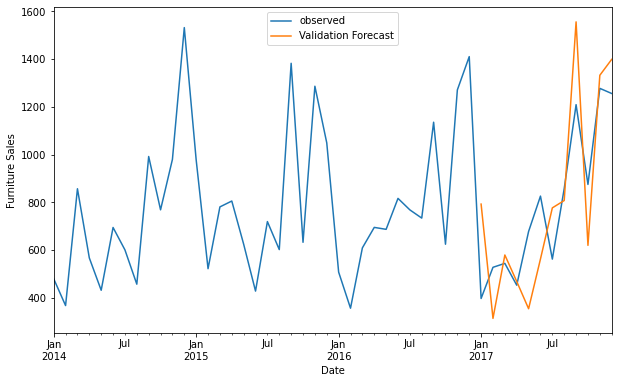

In [45]:

'''start: date from which we need to predict
   pred.predicted_mean : holds the predicted values
   '''
pred = model.get_prediction(start=pd.to_datetime('2017-01-01'))
plt.figure(figsize=(10,6))
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Validation Forecast')
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [46]:
#predicted values 

pred.predicted_mean

Order Date
2017-01-01     792.949434
2017-02-01     314.265632
2017-03-01     579.803132
2017-04-01     468.932393
2017-05-01     354.687212
2017-06-01     562.948849
2017-07-01     777.172661
2017-08-01     807.929707
2017-09-01    1556.342089
2017-10-01     620.158822
2017-11-01    1332.648296
2017-12-01    1399.290959
Freq: MS, dtype: float64

In [47]:
#Metrics Evaluation 

Y_pred = pred.predicted_mean
Y_test = y['2017-01-01':]

from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(Y_test,Y_pred))
print(rms)

230.0628531193044


##### Forecast

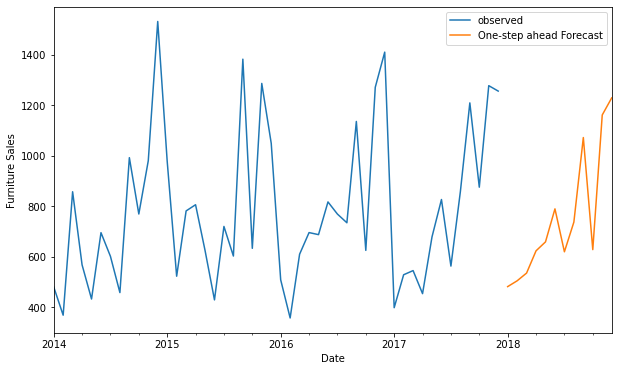

In [50]:
#forecasting for 12 months

pred_uc = model.get_forecast(steps=12)
plt.figure(figsize=(10,6))
ax = y['2014':].plot(label='observed')
pred_uc.predicted_mean.plot(ax=ax, label='One-step ahead Forecast')
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [51]:
#Forecast values

Y_predictions=pred_uc.predicted_mean
Y_predictions

2018-01-01     481.175778
2018-02-01     504.162667
2018-03-01     534.896804
2018-04-01     623.058239
2018-05-01     658.537437
2018-06-01     789.387664
2018-07-01     619.269503
2018-08-01     736.930508
2018-09-01    1072.136407
2018-10-01     627.864085
2018-11-01    1161.662872
2018-12-01    1229.291142
Freq: MS, dtype: float64

In [52]:
#save o/p to file

Y_predictions.to_excel(r"C:\Python Imarticus\Basics\Results_Files\Furniture_Sales_Time_Series_ForecastingOutput.xlsx",
                       index=True)

In [ ]:
'''When we compare RMSE, holts winter model is better than ARIMA. Hence we can predict using Holts winter model as below'''

C:\Users\Neeharika\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


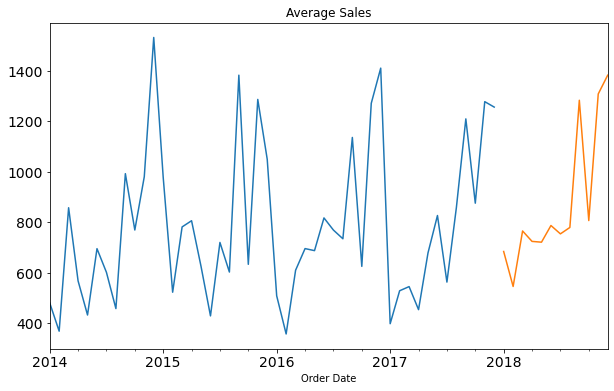

In [55]:
#forecasting for 12 months by using Holt winter model

from statsmodels.tsa.api import ExponentialSmoothing
Holt_Winter_df = pd.DataFrame()
fit1 = ExponentialSmoothing(y ,seasonal_periods=12,trend='add',
                            seasonal='add').fit()
Holt_Winter_df['Holt_Winter'] = fit1.forecast(12)

y.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Holt_Winter_df['Holt_Winter'].plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()

In [56]:
Holt_Winter_df['Holt_Winter']

2018-01-01     683.896935
2018-02-01     545.195599
2018-03-01     765.144717
2018-04-01     723.867971
2018-05-01     720.764741
2018-06-01     786.784259
2018-07-01     753.720739
2018-08-01     779.164279
2018-09-01    1283.393659
2018-10-01     806.487723
2018-11-01    1308.406808
2018-12-01    1382.726366
Freq: MS, Name: Holt_Winter, dtype: float64